**Regression Model**<br/>
*Date: 06-05-2021*<br/>
*Team:*<br/>
Amal Chandrasekharan<br/>
Binesh Babu<br/>
Gokul Kungumaprakash<br/>
Varun Sasi Pakiteeri<br/>

In [ ]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
# Mounting Drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# Importing dataset

df = pd.read_csv('/content/drive/My Drive/My data files/titanic_dataset.csv')
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
# Checking the Data Count
df.shape

(891, 12)

In [ ]:
# Rearranging columns

cols = df.columns.tolist()
cols.insert(11, cols.pop(cols.index('Survived')))
df = df.reindex(columns= cols)
df.head()

PassengerId  Pclass  ... Embarked Survived
0            1       3  ...        S        0
1            2       1  ...        C        1
2            3       3  ...        S        1
3            4       1  ...        S        1
4            5       3  ...        S        0

[5 rows x 12 columns]

In [ ]:
# Checking the Statistical Information

df.describe()

PassengerId      Pclass         Age  ...       Parch        Fare    Survived
count   891.000000  891.000000  714.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118  ...    0.381594   32.204208    0.383838
std     257.353842    0.836071   14.526497  ...    0.806057   49.693429    0.486592
min       1.000000    1.000000    0.420000  ...    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000  ...    0.000000    7.910400    0.000000
50%     446.000000    3.000000   28.000000  ...    0.000000   14.454200    0.000000
75%     668.500000    3.000000   38.000000  ...    0.000000   31.000000    1.000000
max     891.000000    3.000000   80.000000  ...    6.000000  512.329200    1.000000

[8 rows x 7 columns]

In [ ]:
# Checking the correlation between data

df.corr()

PassengerId    Pclass       Age  ...     Parch      Fare  Survived
PassengerId     1.000000 -0.035144  0.036847  ... -0.001652  0.012658 -0.005007
Pclass         -0.035144  1.000000 -0.369226  ...  0.018443 -0.549500 -0.338481
Age             0.036847 -0.369226  1.000000  ... -0.189119  0.096067 -0.077221
SibSp          -0.057527  0.083081 -0.308247  ...  0.414838  0.159651 -0.035322
Parch          -0.001652  0.018443 -0.189119  ...  1.000000  0.216225  0.081629
Fare            0.012658 -0.549500  0.096067  ...  0.216225  1.000000  0.257307
Survived       -0.005007 -0.338481 -0.077221  ...  0.081629  0.257307  1.000000

[7 rows x 7 columns]

In [ ]:
# Checking for Null Values

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
df.loc[df['Cabin'].isna()]

PassengerId  Pclass  ... Embarked Survived
0              1       3  ...        S        0
2              3       3  ...        S        1
4              5       3  ...        S        0
5              6       3  ...        Q        0
7              8       3  ...        S        0
..           ...     ...  ...      ...      ...
884          885       3  ...        S        0
885          886       3  ...        Q        0
886          887       2  ...        S        0
888          889       3  ...        S        0
890          891       3  ...        Q        0

[687 rows x 12 columns]

In [ ]:
# Dropping Cabin
df = df.drop('Cabin', axis=1)
df.head()

PassengerId  Pclass  ... Embarked Survived
0            1       3  ...        S        0
1            2       1  ...        C        1
2            3       3  ...        S        1
3            4       1  ...        S        1
4            5       3  ...        S        0

[5 rows x 11 columns]

In [ ]:
# Removing unwanted columns
df = df.drop(['Name','Ticket'], axis=1)
df.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0            1       3    male  22.0      1      0   7.2500        S         0
1            2       1  female  38.0      1      0  71.2833        C         1
2            3       3  female  26.0      0      0   7.9250        S         1
3            4       1  female  35.0      1      0  53.1000        S         1
4            5       3    male  35.0      0      0   8.0500        S         0

In [ ]:
# Dropping Passenger Id
df = df.drop('PassengerId', axis=1)
df.head(3)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1

In [ ]:
# Filling Random Age between Mean and Max Age for the Null Values

mean = df['Age'].mean()
max = df['Age'].max()
null_count = df['Age'].isna().sum()
random_age = np.random.randint(mean,max,null_count)
age_copy = df['Age'].copy()
age_copy[np.isnan(age_copy)] = random_age
df['Age'] = age_copy


In [ ]:
# Filling Missing Embarked with Mode value

mode = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(mode.at[0])

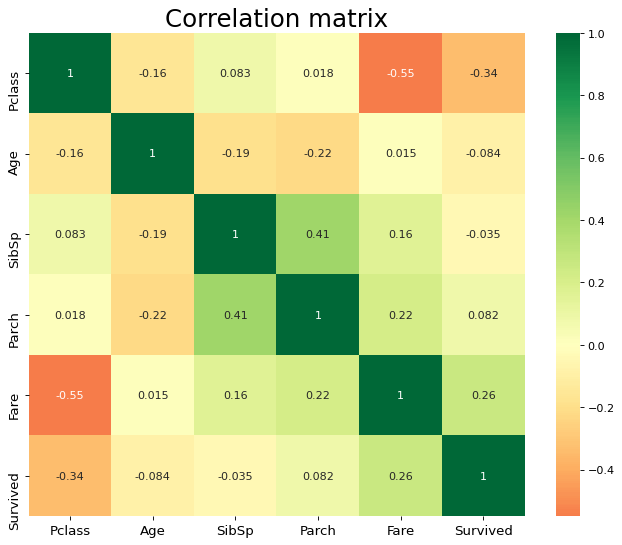

In [ ]:
# Plotting Correlation Matrix
import seaborn as sns

plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlation matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#boxplot finding outliers
columns = ['Pclass','Age','Fare']
df.boxplot(column=columns)
plt.show()

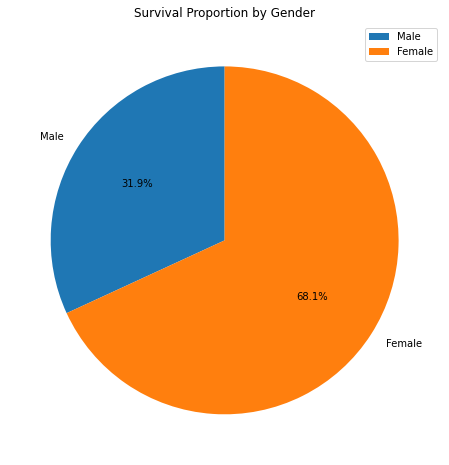

In [ ]:
# Plotting a Pie Chart for Gender based survivability

survived_count = df.loc[df['Survived'] == 1].shape[0]
female_survived_count = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
male_survived_count = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]

female_sur_per = (female_survived_count/survived_count) * 100
male_sur_per = (male_survived_count/survived_count) * 100

y = np.array([male_sur_per,female_sur_per])
labels = ['Male', 'Female']

plt.figure(figsize=(8,8))
plt.pie(y, labels = labels,autopct='%1.1f%%',startangle=90)
plt.title('Survival Proportion by Gender')
plt.legend()
plt.show()



In [ ]:
# Plotting histogram to find Age distribution

plt.figure(figsize=(8,8))
plt.hist(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


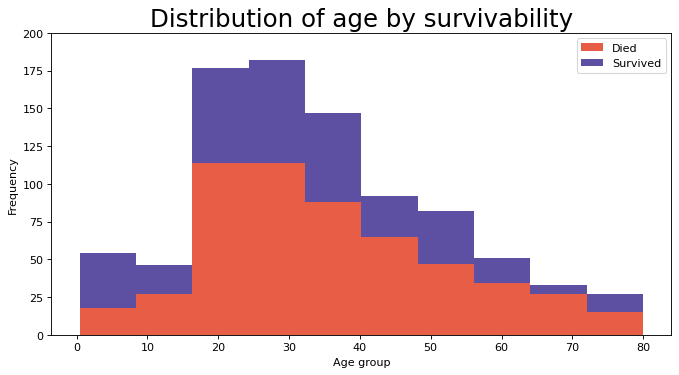

In [ ]:
df_group = df.loc[:, ["Age", 'Survived']].groupby('Survived')
vals = [df['Age'].values.tolist() for i, df in df_group]
plt.figure(figsize=(10,5), dpi= 80)
colors = ["#e85d45","#5d4fa2"]
plt.hist(vals, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({"Died":"#e85d45","Survived":"#5d4fa2"})
plt.title("Distribution of age by survivability", fontsize=22)
plt.xlabel('Age group')
plt.ylabel("Frequency")
plt.ylim(0, 200)
plt.show()

In [ ]:
# Combining two features to form a new Synthetic Feature which specifies
# whether passenger is alone

df.loc[(df['SibSp'] >= 1) | (df['Parch'] >= 1), 'Alone'] = 0
df['Alone'] = df['Alone'].fillna(1)

df = df.drop(['SibSp','Parch'], axis=1)

In [ ]:
# Changing column datatype to int

df['Alone'] = df['Alone'].astype(int)
df.head(3)

Pclass     Sex   Age     Fare Embarked  Survived  Alone
0       3    male  22.0   7.2500        S         0      0
1       1  female  38.0  71.2833        C         1      0
2       3  female  26.0   7.9250        S         1      1

In [ ]:
# Changing gender text data to numeral

gender = {'female': 0, 'male': 1}
df['Sex'] = [gender[value] for value in df['Sex']]

In [ ]:
df.head(3)

Pclass  Sex   Age     Fare Embarked  Survived  Alone
0       3    1  22.0   7.2500        S         0      0
1       1    0  38.0  71.2833        C         1      0
2       3    0  26.0   7.9250        S         1      1

In [ ]:
# Checking the datatypes of the features

df.dtypes

Pclass        int64
Sex           int64
Age         float64
Fare        float64
Embarked     object
Survived      int64
Alone         int64
dtype: object

In [ ]:
# Standardizing Fare using StandardScaler Method

from sklearn.preprocessing import StandardScaler

colName = ['Fare']
feature = df[colName]
scaler = StandardScaler().fit(feature.values)
feature = scaler.transform(feature.values)
df[colName] = feature; 

In [ ]:
df.head()

Pclass  Sex   Age      Fare Embarked  Survived  Alone
0       3    1  22.0 -0.502445        S         0      0
1       1    0  38.0  0.786845        C         1      0
2       3    0  26.0 -0.488854        S         1      1
3       1    0  35.0  0.420730        S         1      0
4       3    1  35.0 -0.486337        S         0      1

In [ ]:
# Binning Ages into different small age groups

from sklearn.preprocessing import KBinsDiscretizer

colName = ['Age']
feature = df[colName]
bin = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
bin.fit(feature.values)
feature = bin.transform(feature.values)
df[colName] = feature

In [ ]:
# One hot encoding for the feature Embarked

df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
df.drop('Embarked', axis=1, inplace=True)
df.head(3)

Pclass  Sex  Age      Fare  ...  Alone  Embarked_C  Embarked_Q  Embarked_S
0       3    1  5.0 -0.502445  ...      0           0           0           1
1       1    0  9.0  0.786845  ...      0           1           0           0
2       3    0  6.0 -0.488854  ...      1           0           0           1

[3 rows x 9 columns]

In [ ]:
df.corr()

Pclass       Sex       Age  ...  Embarked_C  Embarked_Q  Embarked_S
Pclass      1.000000  0.131900 -0.153458  ...   -0.243292    0.221009    0.074053
Sex         0.131900  1.000000  0.078748  ...   -0.082853   -0.074115    0.119224
Age        -0.153458  0.078748  1.000000  ...    0.053367    0.221215   -0.185962
Fare       -0.549500 -0.182333  0.010784  ...    0.269335   -0.117216   -0.162184
Survived   -0.338481 -0.543351 -0.086595  ...    0.168240    0.003650   -0.149683
Alone       0.135207  0.303646  0.218075  ...   -0.095298    0.086464    0.029074
Embarked_C -0.243292 -0.082853  0.053367  ...    1.000000   -0.148258   -0.782742
Embarked_Q  0.221009 -0.074115  0.221215  ...   -0.148258    1.000000   -0.499421
Embarked_S  0.074053  0.119224 -0.185962  ...   -0.782742   -0.499421    1.000000

[9 rows x 9 columns]

In [ ]:
# Splitting dataframe into features and label

df_x = df.drop('Survived', axis=1)
df_y = df['Survived']

In [ ]:
# Splitting dataframe into training set and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.15, random_state=42)

In [ ]:
# Using train set to train the model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression(random_state=0,max_iter=1000)
log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

log_reg.score(X_test,y_test)


0.8208955223880597

In [ ]:
# Plotting Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()